<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий на hh.ru
   

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [106]:
data_df = pd.read_csv('dst-3.0_16_1_hh_database.csv', sep=';')

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [107]:
data_df.head()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [108]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

5. Выведите основную статистическую информацию о столбцах.


In [109]:
data_df.describe(include=['object'])

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [110]:
def get_level_education(education_and_university):

    exclude_list = ['Неоконченное высшее', 'Среднее специальное']
    education_and_university_list = education_and_university.split(' ')
    education_type = education_and_university_list[0] + ' ' + education_and_university_list[1]

    if education_type in exclude_list:
        return education_type
    else:
        education_type = education_and_university_list[0]

    return education_type

data_df['Образование'] = data_df['Образование и ВУЗ'].apply(get_level_education)
data_df['Образование'].unique()   # проверили что уникальные значения правильные

data_df.drop(['Образование и ВУЗ'],axis=1,inplace=True)

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [111]:
data_df['Пол'] = data_df['Пол, возраст'].apply(lambda x: 'Ж' if 'Женщина' in x else 'М')
data_df['Возраст'] = data_df['Пол, возраст'].apply(lambda x: (str(x).split())[2])
data_df['Возраст'] = data_df['Возраст'].astype('int64')
data_df.drop(['Пол, возраст'],axis=1,inplace=True)

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [112]:
def get_experience(experience_str):

    experience_list = str(experience_str).split(' ')
    year_var = ['год', 'года', 'лет']
    month_var = ['месяц', 'месяцев', 'месяца']

    if len(experience_list) >= 6:
        if experience_list[3] in year_var and experience_list[5] in month_var:
            return (int(experience_list[2]) * 12) + int(experience_list[4])
        elif experience_list[3] in year_var and experience_list[5] not in month_var:
            return int(experience_list[2]) * 12
        elif experience_list[3] in month_var:
            return int(experience_list[2])
    else: return np.NaN


data_df['Опыт работы (месяц)'] = data_df['Опыт работы'].apply(get_experience)
data_df.drop(['Опыт работы'],axis=1,inplace=True)

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [113]:
def get_city(data_str):

    data_list = data_str.split(' , ')
    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань',
                      'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа',
                      'Красноярск', 'Пермь', 'Воронеж', 'Волгоград' ]

    if data_list[0] in 'Москва':
        return 'Москва'
    elif data_list[0] in 'Санкт-Петербург':
        return 'Санкт-Петербург'
    elif data_list[0] in million_cities:
        return 'город-миллионник'
    else: return 'другие'

def get_moving_bool(data_str):

    data_list = sep_and_clear_metro(data_str)

    if 'не готов' in data_list[1]:
        return False
    else: return True

def get_business_trips_bool(data_str):

    data_list = sep_and_clear_metro(data_str)

    if len(data_list) < 3:
        return  False
    elif 'не готов' in data_list[2]:
        return  False
    else: return True

def sep_and_clear_metro(data_str):

    data_list = data_str.split(' , ')

    if 'м.' in data_list[1]:
        del data_list[1]

    return data_list

data_df['Город'] = data_df['Город, переезд, командировки'].apply(get_city)
data_df['Готовность к переезду'] = data_df['Город, переезд, командировки'].apply(get_moving_bool)
data_df['Готовность к командировкам'] = data_df['Город, переезд, командировки'].apply(get_business_trips_bool)
data_df.drop(['Город, переезд, командировки'],axis=1,inplace=True)

5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [114]:
def get_columns(parent_column_name):

    columns = []

    for index in range(data_df[parent_column_name].count()):
        child_columns_name = (data_df[parent_column_name][index]).split(', ')

        for column in child_columns_name:

            if column not in columns:
                columns.append(column)

    return columns


def get_data_frame(parent_columns_list):

    for parent_name in parent_columns_list:

        columns = get_columns(parent_name)

        for value in columns:
            data_df[value] = data_df[parent_name].apply(lambda x: True if value in x else False)


get_data_frame(['Занятость', 'График'])

data_df.drop(['Занятость', 'График'],axis=1,inplace=True)

6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [115]:
exchange_rate_df = pd.read_csv('ExchangeRates.csv', sep=';')

def get_currency_iso(salary):

    currency = salary.split(' ')[1]

    if 'бел.руб.' in currency:
        return 'BYN'
    elif 'грн.' in currency:
        return 'UAH'
    elif 'сум' in currency:
        return 'UZS'
    elif 'руб.' in currency:
        return 'RUB'
    else: return currency


columns = exchange_rate_df.columns[0].split(',')

for column in range(len(columns)):
    exchange_rate_df[columns[column]] = exchange_rate_df['currency,per,date,time,close,vol,proportion'].apply(
                                        lambda x: x.split(',')[column])

exchange_rate_df['date'] = pd.to_datetime(exchange_rate_df['date'], dayfirst=True)
exchange_rate_df.drop(['currency,per,date,time,close,vol,proportion', 'per', 'time', 'vol'],axis=1,inplace=True)
data_df['Обновление резюме'] = pd.to_datetime(data_df['Обновление резюме'], dayfirst=True).dt.date

data_df['Сумма'] = data_df['ЗП'].apply(lambda x: int(x.split(' ')[0]))
data_df['currency'] = data_df['ЗП'].apply(get_currency_iso)
data_df['date'] = data_df['Обновление резюме'].astype('datetime64')

data_df = pd.merge(data_df, exchange_rate_df, how="left", on=["currency", "date"])

data_df['close'] = (data_df['close'].fillna(1)).astype('float64')
data_df['proportion'] = (data_df['proportion'].fillna(1)).astype('int64')
data_df['ЗП (руб)'] = round((data_df['close'] / data_df['proportion'] * data_df['Сумма']), 2)
# 'date' удалила потому что дублирует 'Обновление резюме'
data_df.drop(['ЗП', 'Сумма', 'date'],axis=1,inplace=True)

data_df

,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,волонтерство,гибкий график,полный день,сменный график,вахтовый метод,удаленная работа,currency,close,proportion,ЗП (руб)
0,Системный администратор,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,2019-04-16,Имеется собственный автомобиль,Неоконченное высшее,М,39,202.0,другие,...,False,True,True,True,True,True,RUB,1.0,1,29000.0
1,Технический писатель,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",2019-04-12,Не указано,Высшее,М,60,233.0,другие,...,False,True,True,True,False,True,RUB,1.0,1,40000.0
2,Оператор,ПАО Сбербанк,Кассир-операционист,2019-04-16,Не указано,Среднее специальное,Ж,36,123.0,другие,...,False,False,True,False,False,False,RUB,1.0,1,20000.0
3,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,OpenSoft,Инженер-программист,2019-04-08,Не указано,Высшее,М,38,225.0,другие,...,False,True,False,False,False,True,RUB,1.0,1,100000.0
4,Региональный менеджер по продажам,Мармелад,Менеджер по продажам,2019-04-22,Не указано,Высшее,Ж,26,67.0,Москва,...,False,False,True,False,False,False,RUB,1.0,1,140000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44739,"Финансист, аналитик, экономист, бухгалтер, мен...","ООО ""IAS"" (независимый участник объединения Ru...",Руководитель субгруппы,2019-04-22,Не указано,Высшее,М,30,91.0,другие,...,False,False,True,False,False,True,RUB,1.0,1,50000.0
44740,"Системный администратор, IT-специалист",ИП Пестрецов,Предприниматель,2019-04-22,Не указано,Высшее,М,27,84.0,другие,...,False,True,True,True,False,True,RUB,1.0,1,39000.0
44741,"Аналитик данных, Математик","ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,2019-04-09,Не указано,Высшее,Ж,48,257.0,город-миллионник,...,False,False,True,False,False,True,RUB,1.0,1,40000.0
44742,Контент-менеджер,IQ-Maxima,Менеджер проектов,2019-04-26,Имеется собственный автомобиль,Высшее,М,24,46.0,другие,...,False,False,False,False,False,True,RUB,1.0,1,20000.0


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

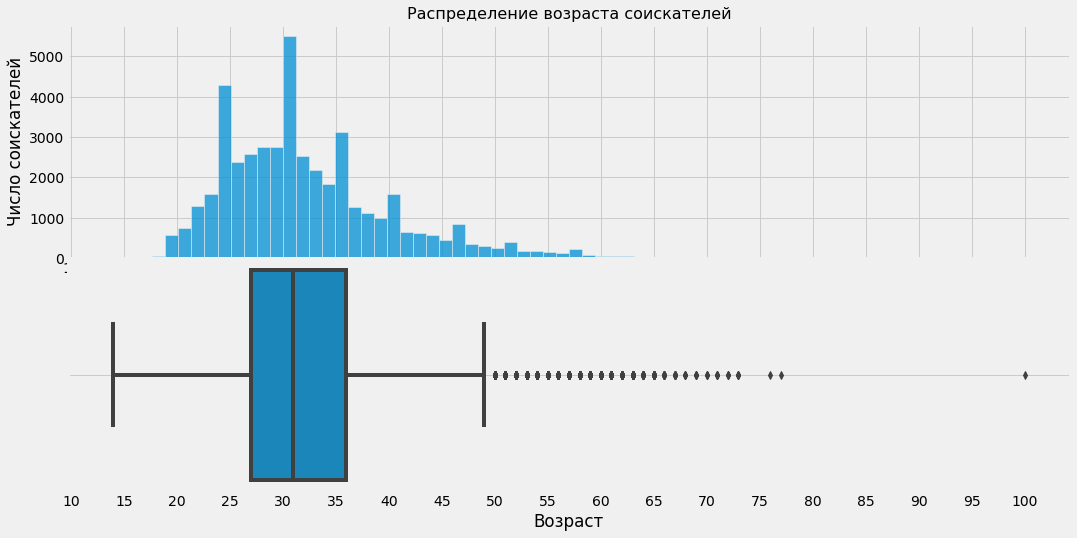

In [116]:

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))
plt.subplots_adjust(hspace=.0)

histplot = sns.histplot(
    data=data_df,
    x='Возраст',
    bins=70,
    ax=axes[0],
)
histplot.set_title('Распределение возраста соискателей', fontsize=16)
histplot.set_xlabel('Возраст')
histplot.set_ylabel('Число соискателей')

histplot.xaxis.set_major_locator(ticker.MultipleLocator(5))
histplot.xaxis.set_minor_locator(ticker.MultipleLocator(1))

boxplot = sns.boxplot(
    data=data_df,
    x='Возраст',
    orient='h',
    width=0.9,
    ax=axes[1],
)
boxplot.set_xlabel('Возраст')
boxplot.grid()
boxplot.xaxis.set_major_locator(ticker.MultipleLocator(5))
boxplot.xaxis.set_minor_locator(ticker.MultipleLocator(1))

1. Мода распределения возраста равна ~ 31 году
2. Предельные значения признака 14 и 100
3. Интервал возраста большинства соискателей находится в диапазоне примерно от 26,5 до 36
4. Аномалии для признака возраста есть, я бы отсеяла все значения, которые выходят за границы полутораквантильного размаха, то есть все значения больше 49 или меньше 14 (таких нет).

3. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

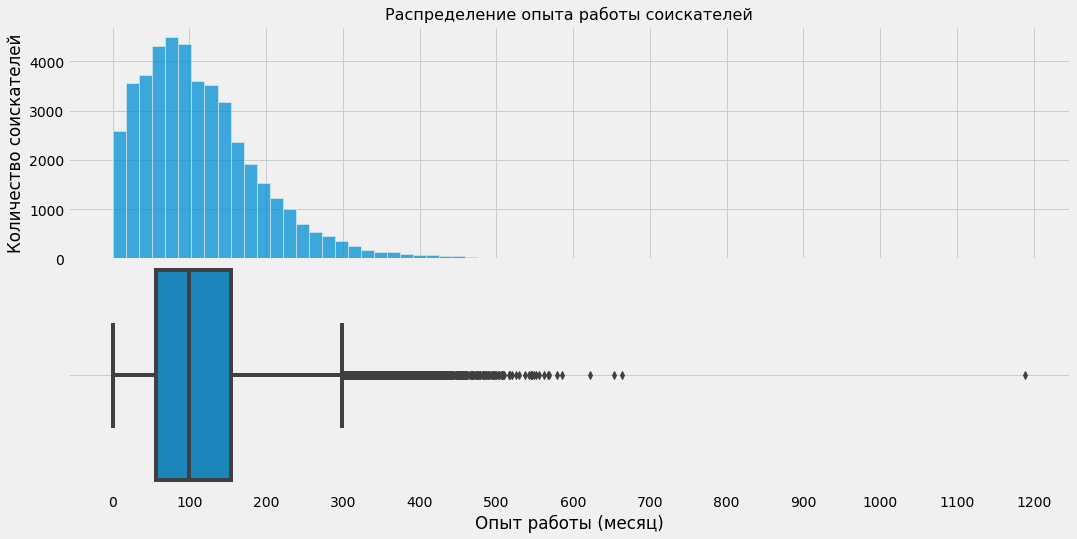

In [117]:

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))
plt.subplots_adjust(hspace=.0)

histplot = sns.histplot(
    data=data_df,
    x='Опыт работы (месяц)',
    bins=70,
    ax=axes[0],
)
histplot.set_title('Распределение опыта работы соискателей', fontsize=16)
histplot.set_xlabel('Опыт работы (месяц)')
histplot.set_ylabel('Количество соискателей')

histplot.xaxis.set_major_locator(ticker.MultipleLocator(100))
histplot.xaxis.set_minor_locator(ticker.MultipleLocator(20))

boxplot = sns.boxplot(
    data=data_df,
    x='Опыт работы (месяц)',
    orient='h',
    width=0.9,
    ax=axes[1],
)
boxplot.set_xlabel('Опыт работы (месяц)')
boxplot.grid()
boxplot.xaxis.set_major_locator(ticker.MultipleLocator(100))
boxplot.xaxis.set_minor_locator(ticker.MultipleLocator(20))

1. Мода распределения опыта работы равна ~ 100 месяцам
2. Предельные значения признака 1 и 1188
3. Интервал опыта работы большинства соискателей находится в диапазоне примерно от 60 до 160 месяцев
4. Аномалии для признака опыта работы есть, я бы отсеяла все значения, которые выходят за границы полутораквантильного размаха, то есть все значения больше 300 или меньше 0 (таких нет).

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака ЗП? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


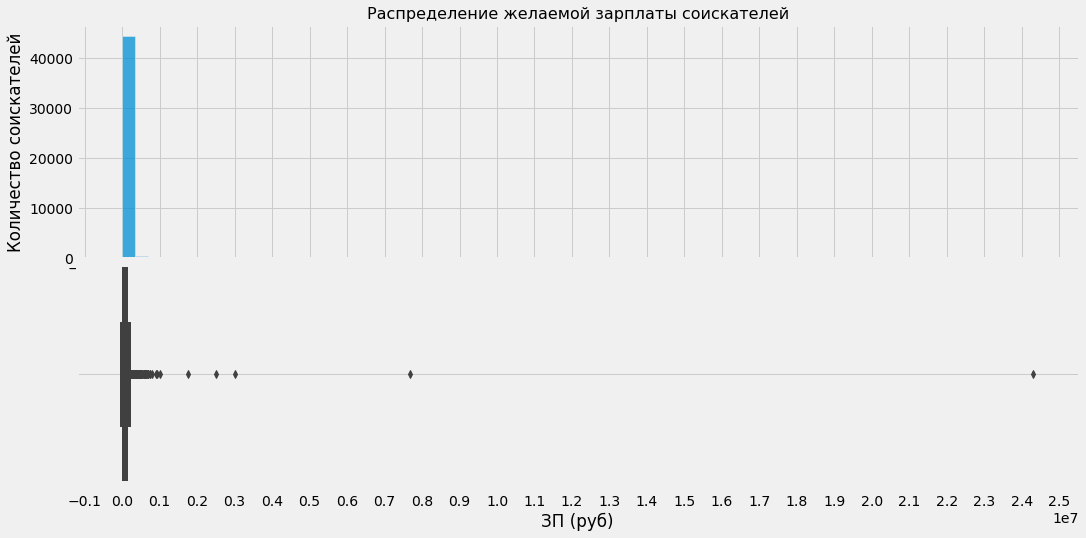

In [118]:

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))
plt.subplots_adjust(hspace=.0)

histplot = sns.histplot(
    data=data_df,
    x='ЗП (руб)',
    bins=70,
    ax=axes[0],
)
histplot.set_title('Распределение желаемой зарплаты соискателей', fontsize=16)
histplot.set_xlabel('ЗП (руб)')
histplot.set_ylabel('Количество соискателей')

histplot.xaxis.set_major_locator(ticker.MultipleLocator(1000000))
histplot.xaxis.set_minor_locator(ticker.MultipleLocator(500000))

boxplot = sns.boxplot(
    data=data_df,
    x='ЗП (руб)',
    orient='h',
    width=0.9,
    ax=axes[1],
)
boxplot.set_xlabel('ЗП (руб)')
boxplot.grid()
boxplot.xaxis.set_major_locator(ticker.MultipleLocator(1000000))
boxplot.xaxis.set_minor_locator(ticker.MultipleLocator(500000))

1. Предельные значения признака желаемой ЗП соискателей 1 и 24304876
2. Примерный интервал желаемой ЗП большинства соискателей находится в диапазоне 37000 и 95000
3. Аномалии точно есть. Например, максимальное значение признака.


4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

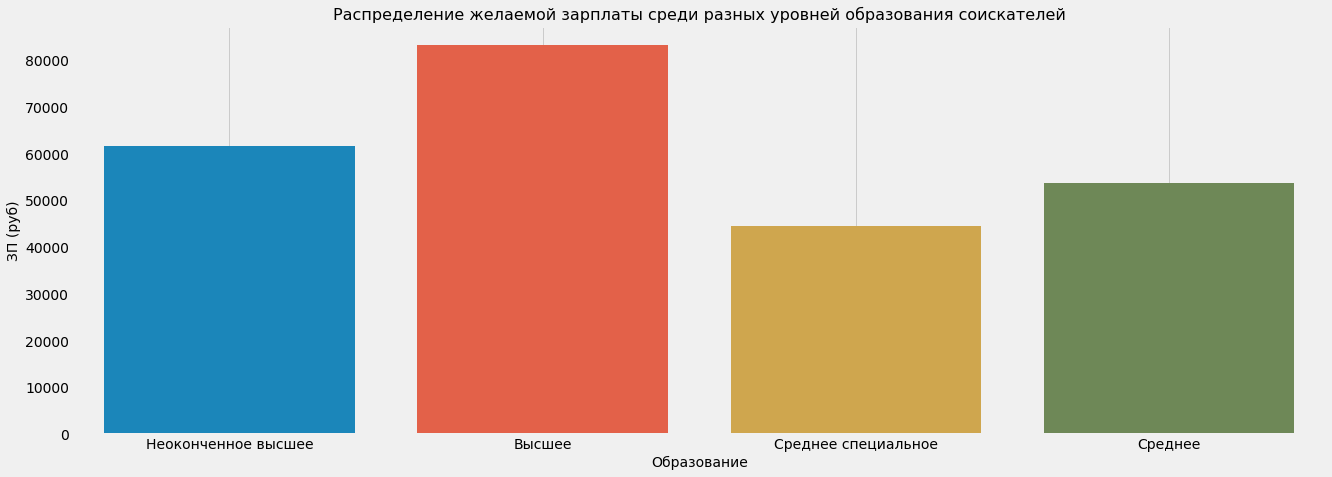

In [119]:
data_slice_df = data_df[data_df['ЗП (руб)'] < 1000000]

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 7))
barplot1 = sns.barplot(
    data=data_slice_df,
    x='Образование',
    y='ЗП (руб)',
    orient='v',
    ci=None
)
barplot1.set_title('Распределение желаемой зарплаты среди разных уровней образования соискателей', fontsize=16)
barplot1.set_xlabel('Образование', fontsize=14)
barplot1.set_ylabel('ЗП (руб)', fontsize=14)
barplot1.grid()

1. Для среднего специального образования уровень желаемой ЗП самый низкий, самый высокий для высшего образования
2. Очень важен

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

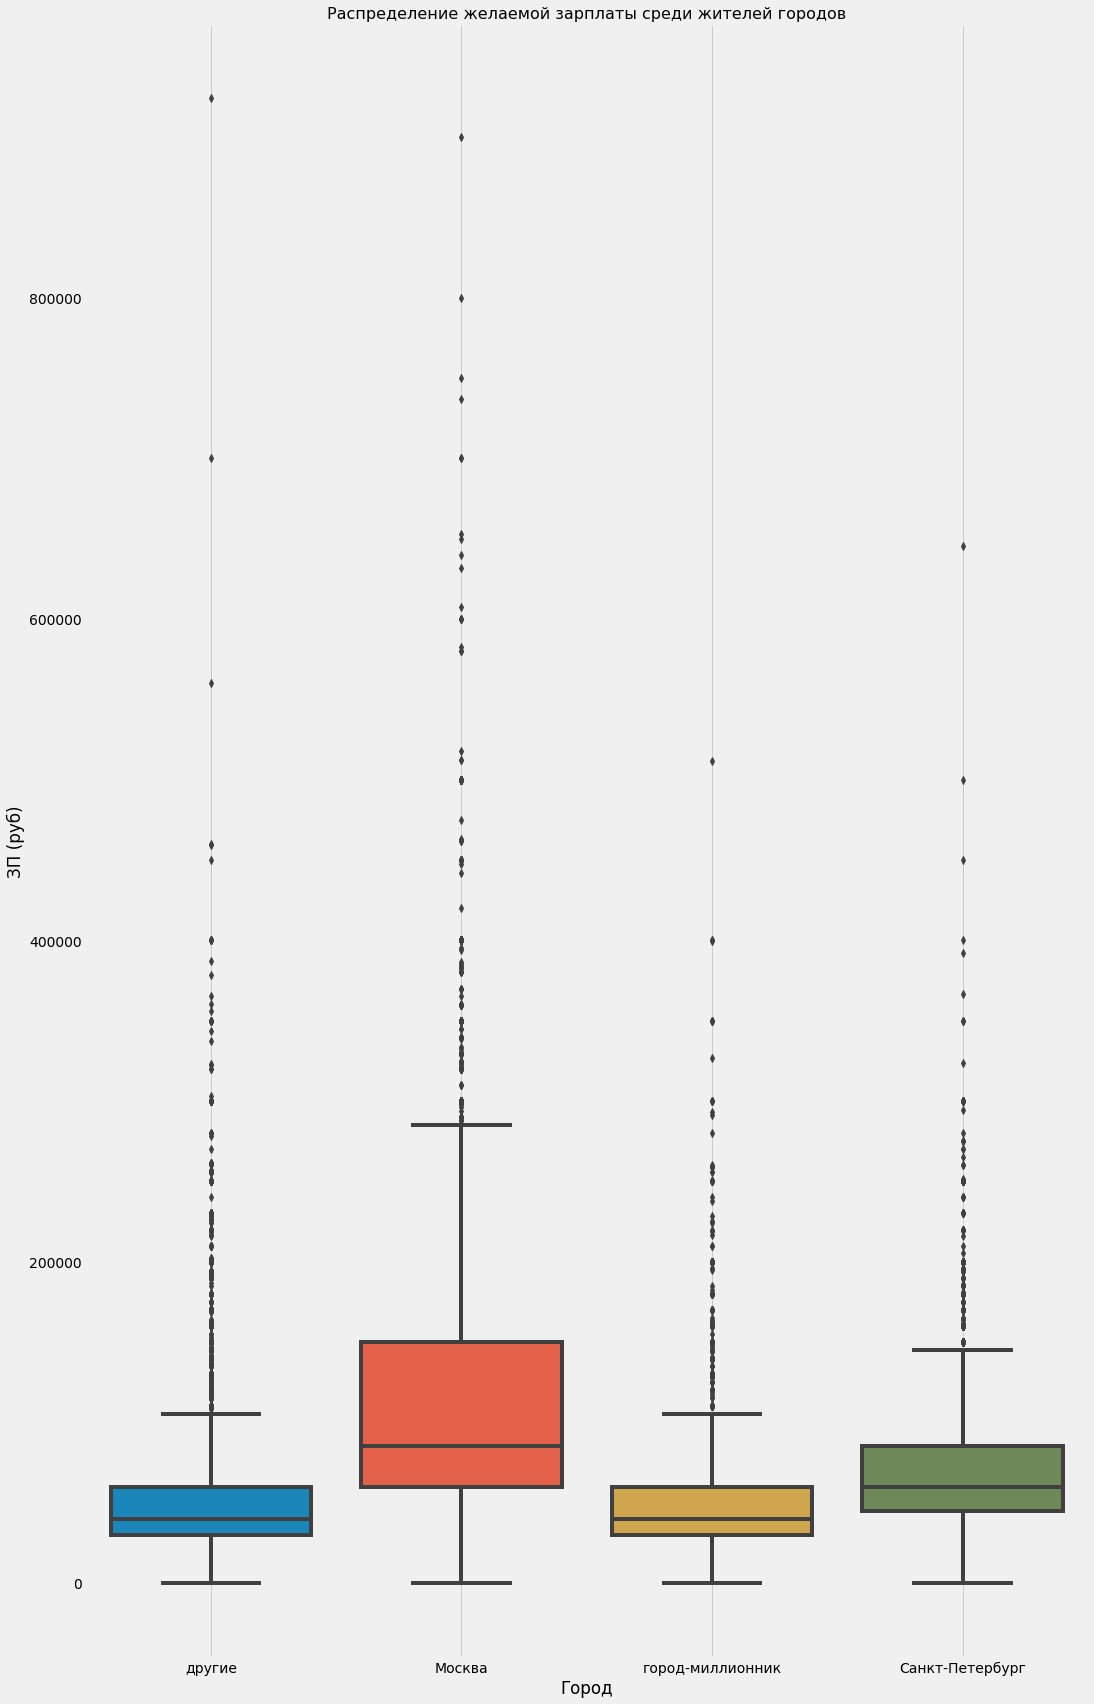

In [145]:
fig = plt.figure(figsize=(16, 28))
boxplot = sns.boxplot(data=data_slice_df, y='ЗП (руб)', x='Город')
boxplot.set_title('Распределение желаемой зарплаты среди жителей городов', fontsize=16)
boxplot.grid()


На первом месте по уровню ожидаемой ЗП - Москва, на втором по этим двум параметрам Санкт-Петербург, и третье место разделяют города-миллионники и другие города.
Признак города очень важен в прогнозировании ЗП, т.к. на графике видно, что ожидания соискателей из Москвы и Санкт-Петербурга сильно отличаются от жителей других городов.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

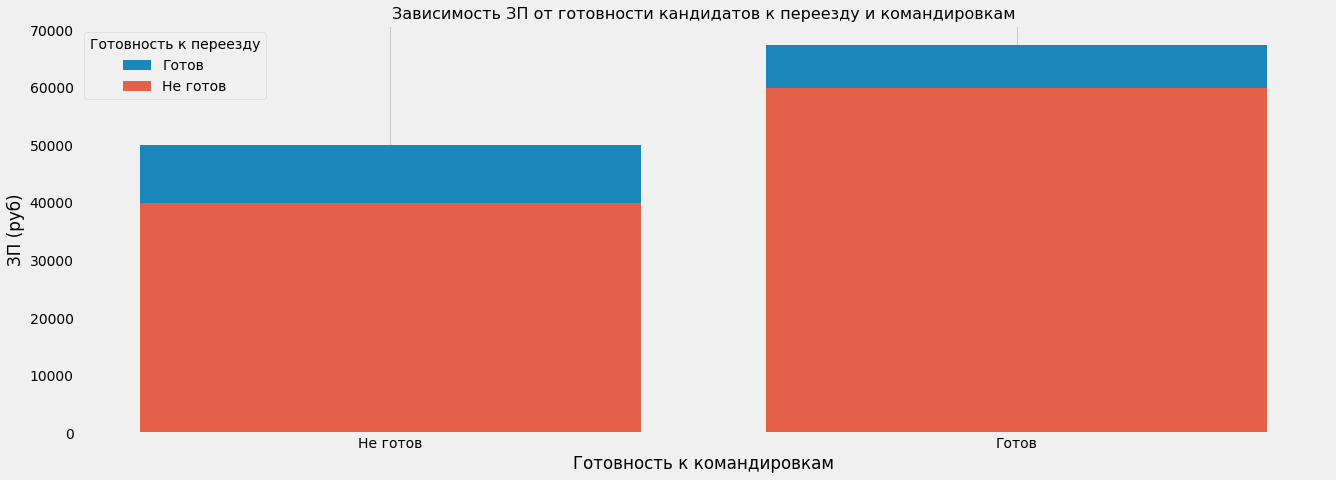

In [146]:
data_median_salary_df = data_df.groupby(['Готовность к переезду', 'Готовность к командировкам'], as_index=False)['ЗП (руб)'].median()
data_median_salary_df['Готовность к переезду'] = data_median_salary_df['Готовность к переезду'].apply(
                                                lambda x: 'Готов' if x is True else 'Не готов')
data_median_salary_df['Готовность к командировкам'] = data_median_salary_df['Готовность к командировкам'].apply(
                                                lambda x: 'Готов' if x is True else 'Не готов')

fig, axes = plt.subplots(figsize=(20, 7))
barplot = sns.barplot(
    data=data_median_salary_df,
    x='Готовность к командировкам',
    y='ЗП (руб)',
    hue='Готовность к переезду',
    hue_order = ['Готов', 'Не готов'],
    orient='v',
    ci=None,
    dodge=False
)
barplot.set_title('Зависимость ЗП от готовности кандидатов к переезду и командировкам', fontsize=16)

barplot.grid()


Выше чем у остальных ожидания к ЗП у кандидатов, которые готовы и к командировкам и к переезду.
На втором месте - готовые к командировкам, но не готовые кпереезду.
Третье место занимают кандидаты, готовые к переезду, но не готовые к командировкам.
На четвертом месте кадидаты, которые не готовы ни к первому ни ко второму.


7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

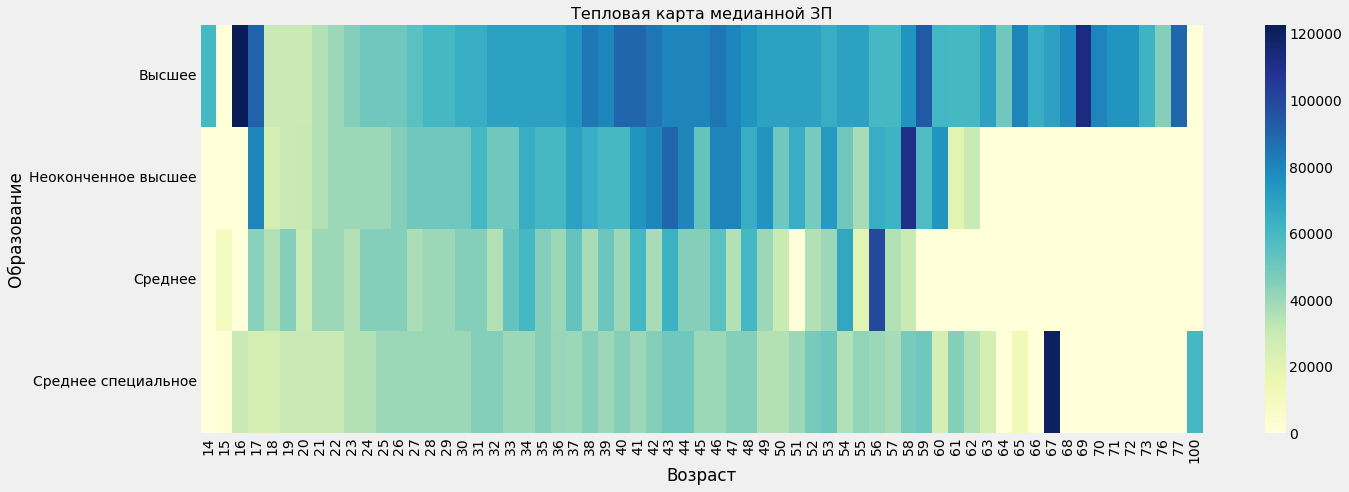

In [122]:
pivot = data_df.pivot_table(
    values='ЗП (руб)',
    index='Образование',
    columns='Возраст',
    aggfunc='median',
    fill_value=0
)
pivot.columns = pivot.columns.astype('string')
fig, axes = plt.subplots(figsize=(20, 7))
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта медианной ЗП', fontsize=16);

Видно, что среди кандидатов с высшим и неоконченным высшим образованием до поступления в вуз (17-18 лет) есть желающие получать 60-80 тысяч рублей, после поступления в вуз (18-23 года) желаемая ЗП резко падает.
После того, как кандидаты с неоконченным высшим образованием начинают искать работу на полную ставку, рост их зарплаты происходит несущественно медленнее, чем у кандидатов с законченным высшим образованием.
Спад ожиданий в ЗП у кандидатов с неоконченным высшим происходит к 60 годам, а у людей с высшим ожидания к зарплате падают только к 80 годам.
У кандидатов со средним и средним специальным образованием рост ожиданий происходит гораздо медленнее и в течении жизни не достигает такого уровня чем у людей, которые учились в ВУЗе, но если сравнивать эти два показателя, то у людей со средним образованием рост ожиданий несущественно быстрее, чем у людей со средним специальным.

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

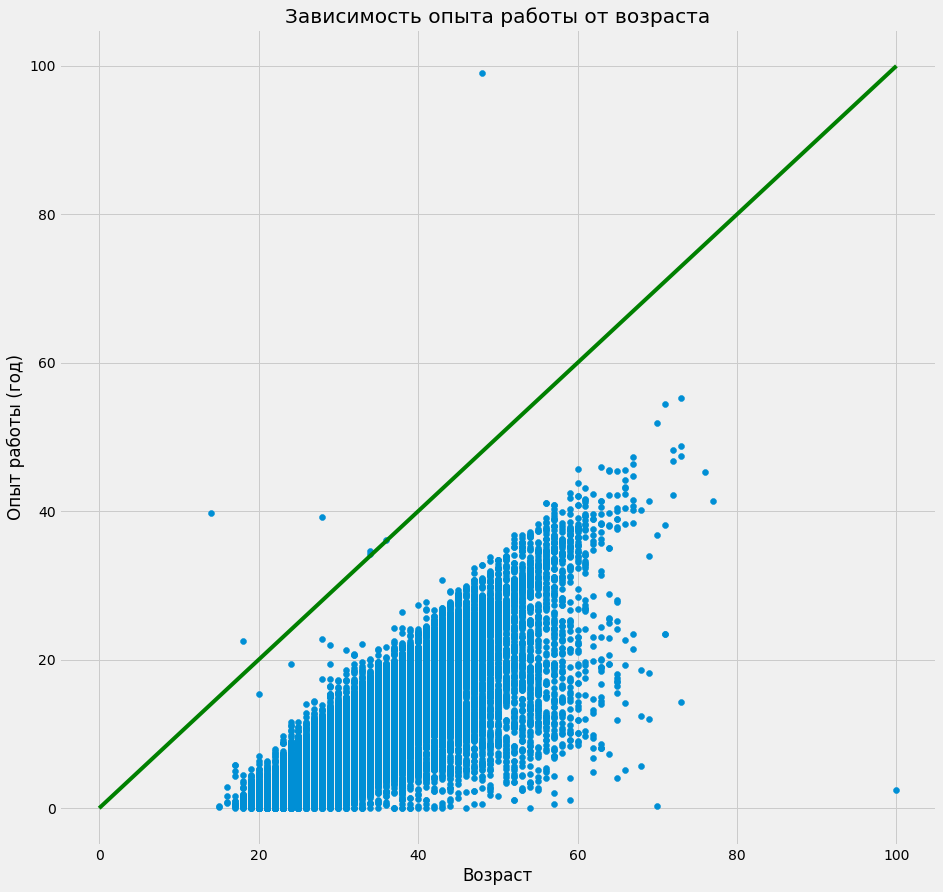

In [123]:
data_df['Опыт работы (год)'] = data_df['Опыт работы (месяц)']
data_df['Опыт работы (год)'] = (data_df['Опыт работы (год)'].fillna(1)).astype('int64')
data_df['Опыт работы (год)'] = data_df['Опыт работы (год)'].apply(lambda x: x / 12)

f, ax = plt.subplots(figsize=(14, 14))
x = np.arange(0, 101, 1)
plt.scatter(x="Возраст", y='Опыт работы (год)', data=data_df)
plt.plot(x, x, color='g')
plt.xlabel("Возраст")
plt.ylabel("Опыт работы (год)")
plt.title("Зависимость опыта работы от возраста")

data_df.drop(['Опыт работы (год)'],axis=1,inplace=True)

На графике видны 7 аномальных записей

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


Посмотрим как изменяется отдельно запрос к ЗП у мужчин и женщин всех возрастов которые представлены.

In [124]:
male_female_salary_df = data_df.groupby(['Возраст', 'Пол'], as_index=False)['ЗП (руб)'].median()
male_female_salary_df.info()

px.line(male_female_salary_df, x='Возраст', y='ЗП (руб)', color='Пол')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Возраст   115 non-null    int64  
 1   Пол       115 non-null    object 
 2   ЗП (руб)  115 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.8+ KB


На графике видно, что у женщин на протяжении жизни в среднем запрос к ЗП ниже, чем у мужчин.

Посмотрим на сколько распространена удаленная работа среди всех категорий городов

/var/folders/sl/l3rskhrs13qdsmkmgwnd1c5w0000gp/T/ipykernel_936/1434002303.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 1.0, 'Уровень желания кандидатов работать удаленно из всех категорий городов')

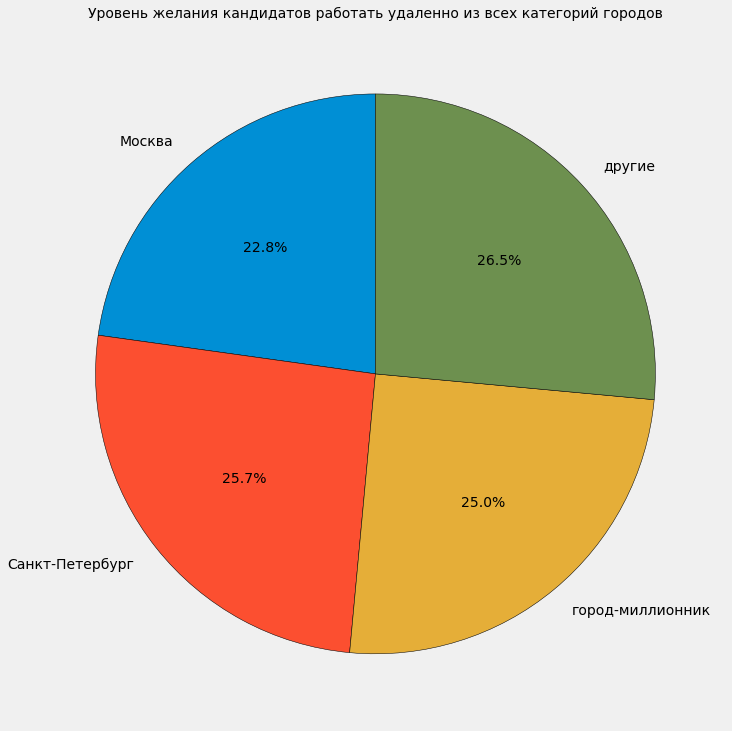

In [125]:
telework_df = data_df[['Город', 'удаленная работа']]
telework_df['удаленная работа'] = data_df['удаленная работа'].apply(lambda x: 'не готов' if x is False else 'готов')
telework_df = pd.DataFrame(telework_df.groupby(['Город', 'удаленная работа'])['удаленная работа'].count().unstack())
telework_df['% готовых'] = round(telework_df['готов'] / (telework_df['готов'] + telework_df['не готов']) * 100)

plt.style.use('fivethirtyeight')
f, ax = plt.subplots(figsize=(12, 12))
plt.pie(
    list(telework_df['% готовых']),
    labels=telework_df.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops= {'edgecolor': 'black'}
)

plt.title('Уровень желания кандидатов работать удаленно из всех категорий городов', fontsize=14)

На круговой диаграмме видно, что выраженной разницы между категориями городов по этому признаку нет, но можно сказать что больше всех хотят работать удаленно кандидаты из других городов, а меньше всего в Москве.

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [126]:
dupl_columns = list(data_df.columns)
mask = data_df.duplicated(subset=dupl_columns)
data_duplicates = data_df[mask]
data = data_df.drop_duplicates(subset=dupl_columns)
f'Число найденных дубликатов: {data_duplicates.shape[0]}'

'Число найденных дубликатов: 161'

2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [127]:
data_df.isna().sum()

Ищет работу на должность:            0
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Обновление резюме                    0
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы (месяц)                170
Город                                0
Готовность к переезду                0
Готовность к командировкам           0
частичная занятость                  0
проектная работа                     0
полная занятость                     0
стажировка                           0
волонтерство                         0
гибкий график                        0
полный день                          0
сменный график                       0
вахтовый метод                       0
удаленная работа                     0
currency                             0
close                                0
proportion                           0
ЗП (руб)                 

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [128]:
data_df = data_df.dropna(axis=0, how='any', subset=['Последнее/нынешнее место работы'])
data_df = data_df.dropna(axis=0, how='any', subset=['Последняя/нынешняя должность'])
data_df['Опыт работы (месяц)'] = data_df['Опыт работы (месяц)'].fillna(data_df['Опыт работы (месяц)'].median())
round(data_df['Опыт работы (месяц)'].mean())

114

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [129]:
bad_data = data_df[(data_df['ЗП (руб)'] < 1000) | (data_df['ЗП (руб)'] > 1000000)]
data_df = data_df.drop(bad_data.index, axis=0)
bad_data

,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,волонтерство,гибкий график,полный день,сменный график,вахтовый метод,удаленная работа,currency,close,proportion,ЗП (руб)
253,Руководитель аналитики/crm/data science,РОСБАНК,Head of analytics and reporting in CRM,2019-04-10,Не указано,Высшее,М,34,154.0,Москва,...,False,False,True,False,False,False,RUB,1.0000,1,420.00
514,"Oracle DBA, системный инженер",Банк,эксперт,2019-04-19,Не указано,Высшее,М,37,162.0,Москва,...,False,True,True,True,False,True,RUB,1.0000,1,160.00
552,3D художник,ООО «Центр технологий и медиа групп»,3D-дизайнер,2019-04-26,Не указано,Высшее,М,27,48.0,другие,...,True,True,True,True,True,True,USD,64.6794,1,452.76
1087,"Директор по продукту {Internet, Blockchain}",EXSCUDO,Директор по продукту,2019-04-26,Не указано,Высшее,М,36,142.0,Москва,...,False,False,True,False,False,False,RUB,1.0000,1,1.00
2248,"Электромонтер КИПиА, электромеханик, IT, сеть ...","СК ""Град""","Электромонтажник, ОПС, разнорабочий, стропольщик.",2019-04-16,Не указано,Среднее,М,31,62.0,другие,...,False,True,True,True,True,True,RUB,1.0000,1,250.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42329,Инженер- программист,"OZON.ru, Интернет-магазин",Разработчик информационных систем,2018-12-05,Не указано,Неоконченное высшее,М,29,103.0,Москва,...,False,False,True,False,False,True,RUB,1.0000,1,140.00
42841,Ведущий системный администратор,"ГАЗИНФОРМСЕРВИС, ООО",Старший инженер,2019-04-22,Не указано,Высшее,М,32,114.0,Санкт-Петербург,...,False,False,True,True,False,False,RUB,1.0000,1,85.00
43134,Chief AI Officer,Finnish Russian Univeristy Cooperation in Tele...,Project Manager in Multimedia Technologies,2018-10-25,Не указано,Высшее,М,38,97.0,Москва,...,False,False,True,False,False,False,RUB,1.0000,1,2500000.00
43385,Директор по управлению проектами / Директор по...,One Agile,Исполнительный директор,2019-05-07,Не указано,Высшее,М,46,282.0,Москва,...,False,False,True,False,False,False,RUB,1.0000,1,1.00


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [130]:
bad_data = data_df[(data_df['Возраст'] < (data_df['Опыт работы (месяц)'] / 12))]
data_df = data_df.drop(bad_data.index, axis=0)
bad_data

,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,волонтерство,гибкий график,полный день,сменный график,вахтовый метод,удаленная работа,currency,close,proportion,ЗП (руб)
4535,Технический специалист,а,а,2019-04-11,Не указано,Среднее специальное,Ж,18,271.0,другие,...,False,False,False,True,False,True,RUB,1.0000,1,15000.0
19351,Специалист (Junior-программист),"Русский свет, ООО",Электрик,2019-04-26,Не указано,Высшее,М,28,470.0,другие,...,False,False,True,False,False,False,RUB,1.0000,1,20000.0
19872,Аналитик,Kyivstar,Фахівець з опису бізнес процесів,2019-04-26,Не указано,Высшее,М,34,416.0,другие,...,False,False,True,False,False,False,UAH,24.2962,10,60740.5
26477,Менеджер IT-проектов,"М©й IT'M (""Информационные Технологии' Менеджм...",Основатель,2019-04-08,Не указано,Высшее,М,34,411.0,Санкт-Петербург,...,True,True,True,True,True,True,RUB,1.0000,1,80000.0
29098,Ведущий инженер-программист,"КБ Аметист, Концерн АГАТ",Ведущий инженер-программист,2019-04-26,Не указано,Высшее,М,14,477.0,Москва,...,False,False,True,False,False,False,RUB,1.0000,1,60000.0
40015,Системный администратор Windows,АО ТК Горизонт,Начальник отдела информационных технологий,2019-04-16,Не указано,Высшее,М,48,1188.0,город-миллионник,...,False,True,True,False,True,True,RUB,1.0000,1,60000.0
43451,Руководитель отдела разработки,ЛАНИТ,Руководитель проекта,2018-08-17,Не указано,Высшее,М,36,434.0,Москва,...,False,False,True,False,False,False,RUB,1.0000,1,200000.0


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

0.45278668633744396

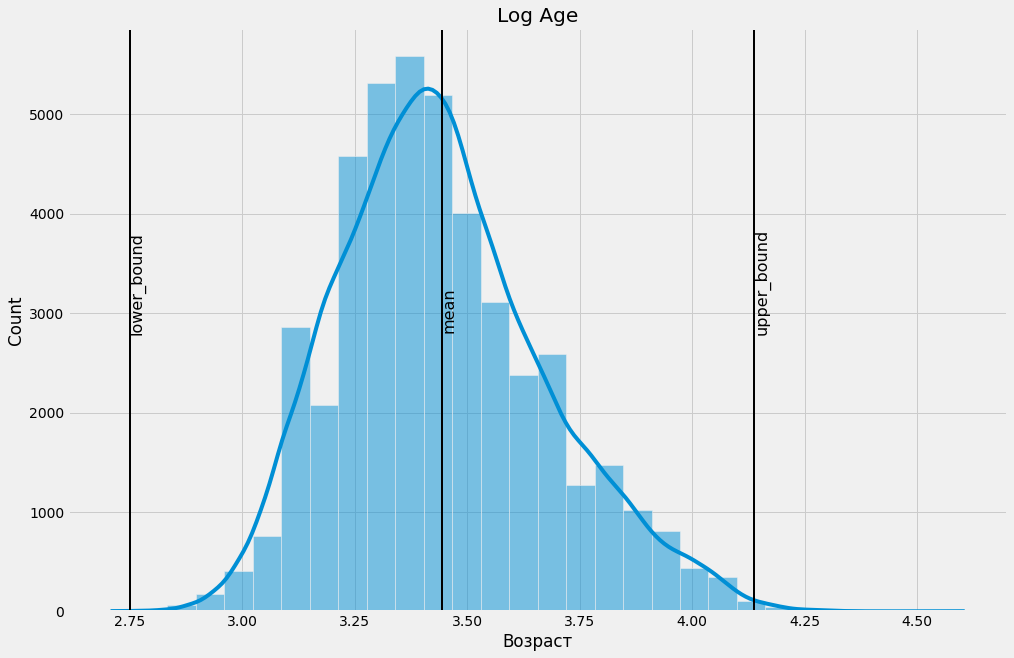

In [131]:
fig, axes = plt.subplots(figsize=(15, 10))

log_age = np.log(data_df['Возраст'])
log_age_mean = log_age.mean()
log_age_max = (log_age.groupby(log_age).count()).max()
sigma = log_age.std()
lower_bound = log_age_mean - 3 * sigma
upper_bound = log_age_mean + 3 * sigma

histplot = sns.histplot(
    log_age,
    bins=30,
    kde=True
)
histplot.axvline(log_age_mean, color='k', lw=2)
histplot.text(x=log_age_mean, y=log_age_max, s='mean', fontsize=16, rotation=90)

histplot.axvline(lower_bound, color='k', lw=2)
histplot.text(x=lower_bound, y=log_age_max, s='lower_bound', fontsize=16, rotation=90)

histplot.axvline(upper_bound, color='k', lw=2)
histplot.text(x=upper_bound, y=log_age_max, s='upper_bound', fontsize=16, rotation=90)

histplot.set_title('Log Age')

log_age.skew()

Распределение имеет левостороннюю асимметрию

In [132]:
x = log_age
mu = x.mean()
sigma = x.std()
lower_bound = mu - 3 * sigma
upper_bound = mu + 4 * sigma
outliers = log_age[(x < lower_bound) | (x > upper_bound)]
outliers_data = data_df.loc[outliers.index]
data_df = data_df.drop(outliers.index, axis=0)
outliers_data

,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,волонтерство,гибкий график,полный день,сменный график,вахтовый метод,удаленная работа,currency,close,proportion,ЗП (руб)
31137,Менеджер по работе с клиентами,"ООО ""ФёрстКэшКомпани""",Менеджер по работе с клиентами,2019-04-06,Не указано,Среднее,М,15,2.0,Санкт-Петербург,...,False,True,False,True,False,True,RUB,1.0,1,10000.0
32950,Тестировщик игр,OOO ЖМЫХ,Тестировщик ПО,2019-04-09,Не указано,Среднее специальное,М,15,3.0,другие,...,False,False,True,False,False,False,RUB,1.0,1,2000.0
33654,Frontend-разработчик,Freelance,Frontend-разработчик,2019-04-19,Не указано,Среднее специальное,М,100,30.0,Санкт-Петербург,...,False,True,True,False,False,True,RUB,1.0,1,60000.0


В категорию выбросов попали кандидаты с возрастом 15 и 100 лет